The necessary python libraries are imported here-

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

Now we will read the dataset using **read.csv()**. We will only retain the **passengers** column from the dataset and **reshape** it by converting it into a **numpy array**.

In [53]:
dataset = pd.read_csv('AirPassengers.csv')
dataset = dataset['#Passengers']
dataset = np.array(dataset).reshape(-1,1)
dataset[:10]

array([[112],
       [118],
       [132],
       [129],
       [121],
       [135],
       [148],
       [148],
       [136],
       [119]], dtype=int64)

Now we will plot the dataset. We can observe that the number of passengers has increased linearly.

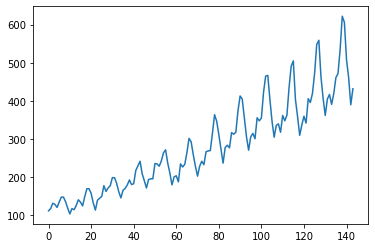

In [54]:
plt.plot(dataset)

Neural networks work better if inputs are between 0 and 1. So we are going to scale down the inputs using **MinMaxScaler()**. We can see that after scaling the minimum value is 0 and maximum value is 1.

In [55]:
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)
dataset.min(),dataset.max()

(0.0, 1.0)

We are going to use the data of first **100 months** as **training data** and the last **44 months** as **testing data**.

In [56]:
train_size = 100
test_size = 44
train = dataset[0:train_size, :]
train.shape

(100, 1)

In [57]:
test = dataset[train_size:144, :]
test.shape

(44, 1)

### Create training and testing dataset
We are going to predict the (i)th value in the dataset on the basis of (i-1)th value. That means we are going to look back by 1 to predict the next value. Hence we are creating a function **get_data()** to create **dataX** and **dataY** for the **training** as well as the **testing** data.

In [58]:
def get_data(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i+look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 1
X_train, y_train = get_data(train, look_back)
X_train[:10]

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753]])

In [59]:
y_train[:10]

array([0.02702703, 0.05405405, 0.04826255, 0.03281853, 0.05984556,
       0.08494208, 0.08494208, 0.06177606, 0.02895753, 0.        ])

Now we have called **get_data()** to create the **testing data**.

In [60]:
X_test, y_test = get_data(test, look_back)

In [61]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((98, 1), (42, 1), (98,), (42,))

Now we are going to reshape our data and make it 3 dimensional using **reshape()** to make it compatible with LSTM.

In [62]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [63]:
X_train.shape

(98, 1, 1)

## Build the model
Our sequential model has 2 layers

### LSTM layer:
This is the main layer of the model and has **5 units**. It learns long-term dependencies between time steps in time series and sequence data. **input_shape** contains the shape of input which we have to pass as a parameter to the first layer of our neural network.

### Dense layer:
Dense layer is the regular deeply connected neural network layer. It is most common and frequently used layer. We have number of **units** as 1 because we are going to get a single value as the output.

In [64]:
model = Sequential()
model.add(LSTM(5, input_shape = (1, look_back)))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

We have compliled the model. We can see the summary using **model.summary()**.

In [65]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 5)                 140       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


After compiling the model we will now train the model using **model.fit()** on the training dataset. We will use **50 epochs** to train the model. An epoch is an iteration over the entire x and y data provided. **batch_size** is the number of samples per gradient update i.e. the weights will be updates after every training example.

In [66]:
model.fit(X_train, y_train, epochs=50, batch_size=1)

Epoch 1/50
98/98 [==============================] - 0s 2ms/step - loss: 0.0277
Epoch 2/50
98/98 [==============================] - 0s 2ms/step - loss: 0.0119
Epoch 3/50
98/98 [==============================] - 0s 1ms/step - loss: 0.0100
Epoch 4/50
98/98 [==============================] - 0s 2ms/step - loss: 0.0090
Epoch 5/50
98/98 [==============================] - 0s 2ms/step - loss: 0.0083
Epoch 6/50
98/98 [==============================] - 0s 2ms/step - loss: 0.0070
Epoch 7/50
98/98 [==============================] - 0s 2ms/step - loss: 0.0061
Epoch 8/50
98/98 [==============================] - 0s 3ms/step - loss: 0.0052
Epoch 9/50
98/98 [==============================] - 0s 4ms/step - loss: 0.0045
Epoch 10/50
98/98 [==============================] - 0s 4ms/step - loss: 0.0038
Epoch 11/50
98/98 [==============================] - 0s 4ms/step - loss: 0.0033
Epoch 12/50
98/98 [==============================] - 0s 3ms/step - loss: 0.0029
Epoch 13/50
98/98 [==============================

Now we will test our model using **X_test**.

In [67]:
y_pred = model.predict(X_test)

In [68]:
y_pred

array([[0.48569262],
       [0.6027654 ],
       [0.6739502 ],
       [0.67717785],
       [0.5719998 ],
       [0.47128677],
       [0.39449948],
       [0.4513535 ],
       [0.4586181 ],
       [0.41845247],
       [0.49823096],
       [0.4730918 ],
       [0.50001687],
       [0.6246393 ],
       [0.7153084 ],
       [0.7370307 ],
       [0.5719998 ],
       [0.49286523],
       [0.40372938],
       [0.45317137],
       [0.49465507],
       [0.46224356],
       [0.5754448 ],
       [0.5581551 ],
       [0.5993741 ],
       [0.6852135 ],
       [0.8012978 ],
       [0.817139  ],
       [0.670715  ],
       [0.5771649 ],
       [0.49823096],
       [0.57372314],
       [0.5942741 ],
       [0.5494507 ],
       [0.59767586],
       [0.6674721 ],
       [0.6852135 ],
       [0.7822609 ],
       [0.90318286],
       [0.88207984],
       [0.7416348 ],
       [0.6674721 ]], dtype=float32)

This is the **scaler** value which we had used earlier.

In [69]:
scaler.scale_

array([0.0019305])

We had scaled down the values in our dataset before passing it to the neural network. Now we will have to get the original values back. For this we will use ***scaler.inverse_transform()***.

In [70]:
y_pred = scaler.inverse_transform(y_pred)
y_test = np.array(y_test)
y_test = y_test.reshape(-1, 1)
y_test = scaler.inverse_transform(y_test)

Now we will visualize the result by plotting the real values and the predicted values.

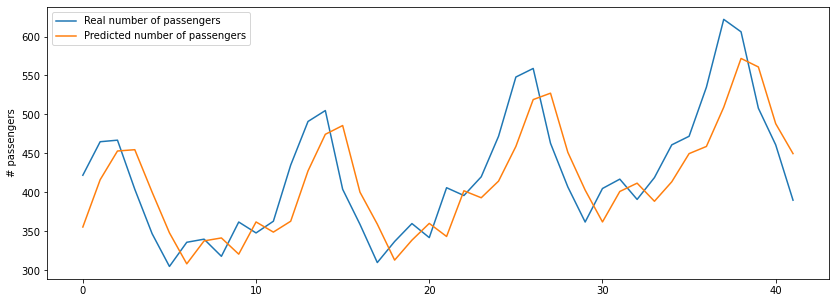

In [71]:
# plot baseline and predictions
plt.figure(figsize=(14,5))
plt.plot(y_test, label = 'Real number of passengers')
plt.plot(y_pred, label = 'Predicted number of passengers')
plt.ylabel('# passengers')
plt.legend()
plt.show()

As we can see that the actual results and the predicted results are following the same trend. Our model is predicting the number of passengers with a good accuracy.